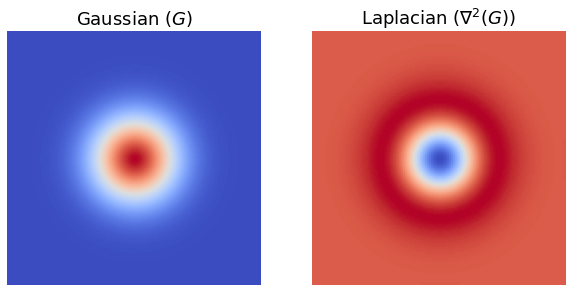

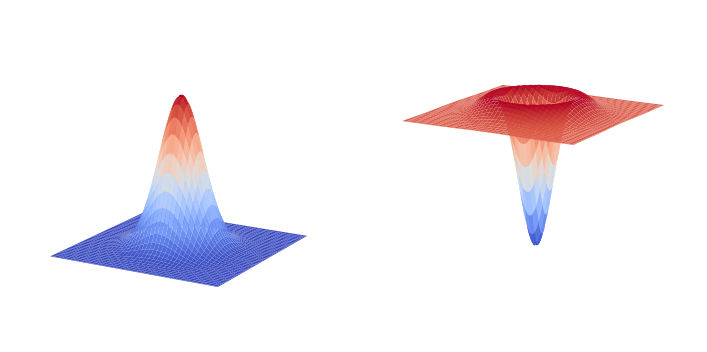

In [204]:
import numpy as np
from skimage import img_as_ubyte, img_as_float
import matplotlib.pyplot as plt
from scipy.ndimage.filters import laplace
def gaussian(sigma, size):
    """
    Gaussian function.
    
    sigma: the standard deviation of the Gaussian function
    size: the size of the output image
    """
    img = np.zeros((size, size))

    sigma2 = sigma**2
    a = 1.0/(2.0*np.pi*sigma2)
    

    for x in range(size):
        for y in range(size):
            img[x, y] = a*np.exp(-((x-size/2)**2 + (y-size/2)**2)/(2*sigma2))

    return img/np.max(img)

img_size = 128
X = range(-img_size//2, img_size//2)
Y = range(-img_size//2, img_size//2)
X, Y = np.meshgrid(X, Y)
Z = gaussian(15, img_size)
Z_lap = laplace(Z)
Z_lap_norm = (Z_lap-np.min(Z_lap))/np.ptp(Z_lap)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img_as_ubyte(Z), cmap='coolwarm', vmin=0, vmax=255)
ax[0].set_title('Gaussian ($G$)', fontsize=18)

ax[1].imshow(img_as_ubyte(Z_lap_norm), cmap='coolwarm', vmin=0, vmax=255)
ax[1].set_title('Laplacian ($\\nabla^2(G)$)', fontsize=18)

for a in ax:
    a.axis('off')
plt.show()

fig, ax = plt.subplots(1, 2, subplot_kw={"projection": "3d"}, figsize = (10, 5))

ax[0].plot_surface(X, Y, Z, linewidth = 0, antialiased = True, cmap="coolwarm")
ax[1].plot_surface(X, Y, Z_lap, linewidth = 0, antialiased = True, cmap="coolwarm")

for a in ax:
    a.axis("off")
    a.view_init(elev=15, azim=30)

plt.tight_layout()

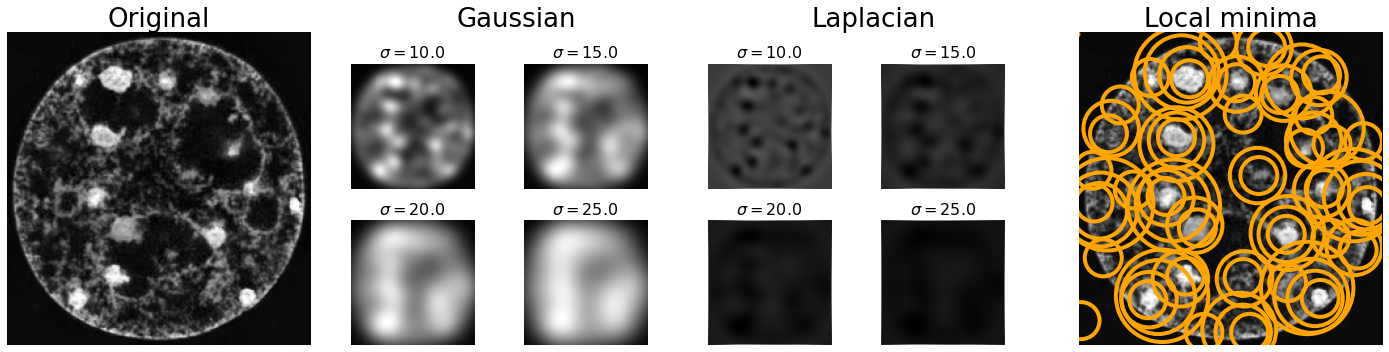

In [205]:
from skimage.io import imread
from skimage.filters import gaussian
from skimage.feature import peak_local_max, blob_log

sigma = np.array([10.0, 15.0, 20.0, 25.0])
radii = np.sqrt(2.0)*sigma

nucleus = imread("nucleus_blob.png")
nucleus_gaus = [gaussian(nucleus, sigma=s) for s in sigma]
nucleus_log = [laplace(g) * np.mean(sigma) ** 2 for g in nucleus_gaus]

threshold = 0

local_max = np.empty((1, 3))
for i in range(len(sigma)):
    peaks = peak_local_max(-nucleus_log[i], threshold_abs=threshold)
    peaks = np.append(peaks, radii[i] * np.ones((peaks.shape[0], 1)), axis=1)
    local_max = np.append(local_max, peaks, axis=0)
#local_max = blob_log(nucleus, min_sigma=10, max_sigma=15)

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(nucleus, cmap="gray")
ax[0].set_title("Original", fontsize=26)

inset_coords = [[0, 0.5, 0.4, 0.4], [0.5, 0.5, 0.4, 0.4],
                [0, 0, 0.4, 0.4], [0.5, 0, 0.4, 0.4]]
for i, g in enumerate(nucleus_gaus):
    axin = ax[1].inset_axes(inset_coords[i])    
    axin.imshow(g, cmap="gray")
    axin.set_title(f"$\sigma={sigma[i]}$", fontsize=16)
    axin.axis("off")
ax[1].set_title("Gaussian", fontsize=26)

for i, l in enumerate(nucleus_log):
    axin = ax[2].inset_axes(inset_coords[i])    
    axin.imshow(l, cmap="gray")
    axin.set_title(f"$\sigma={sigma[i]}$", fontsize=16)
    axin.axis("off")
ax[2].set_title("Laplacian", fontsize=26)

ax[3].imshow(nucleus, cmap="gray")
# Draw a circle at each of the local maximum positions


for y, x, radius in local_max:    
    c = plt.Circle((x, y), radius, color='orange', linewidth=4, fill=False)
    ax[3].add_artist(c)
ax[3].set_title("Local minima", fontsize=26)

for a in ax:
    a.axis('off')
plt.tight_layout()

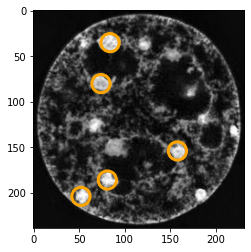

In [206]:
blobs = blob_log(nucleus, min_sigma=10, max_sigma=15, num_sigma=10, threshold=0.3, overlap=.4)

plt.imshow(nucleus, cmap="gray")

for b in blobs: 
    y, x, radius = b
    # Create a circle at the blob center, with the calculated radius
    c = plt.Circle((x, y), radius, color='orange', 
        linewidth=3, fill=False)
    # Draw the circle on the image (gca = "get current axis")
    plt.gca().add_artist(c)

plt.show()

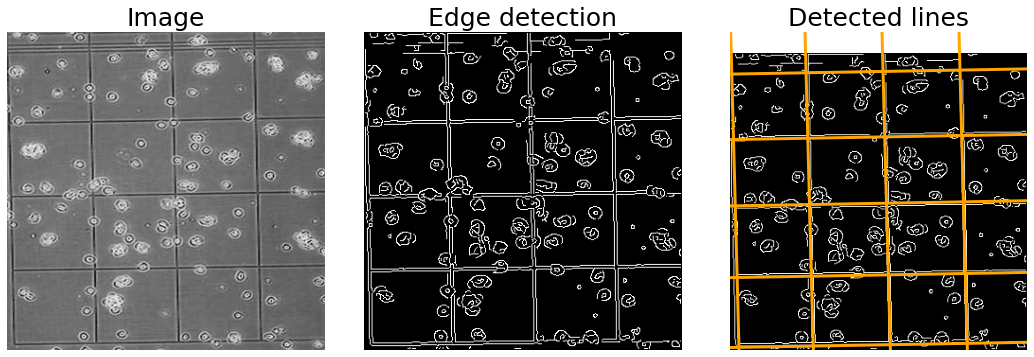

In [207]:
from skimage.feature import canny
from skimage.transform import hough_line, hough_line_peaks, hough_circle, hough_circle_peaks

chamber = imread("cell_counting_chamber.jpg")
chamber_canny = canny(chamber, sigma=1.5)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(chamber, cmap="gray")
ax[0].set_title("Image", fontsize=25)
ax[1].imshow(chamber_canny, cmap="gray")
ax[1].set_title("Edge detection", fontsize=25)
ax[2].imshow(canny(chamber, sigma=1.5), cmap="gray")

h, angles, d = hough_line(chamber_canny)

for _, angle, dist in zip(*hough_line_peaks(h, angles, d)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    ax[2].axline((x0, y0), slope=np.tan(angle + np.pi/2), linewidth=3, color='orange')
ax[2].set_title("Detected lines", fontsize=25)

for a in ax:
    a.axis('off')

plt.tight_layout()

88.99, 253.77
88.99, 97.60
-1.51, 258.77
-1.51, 171.68
88.99, 332.85
-1.51, 84.59
88.99, 172.68
-1.51, 0.50
88.99, 23.52


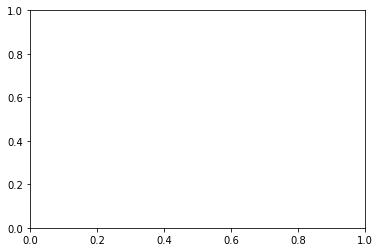

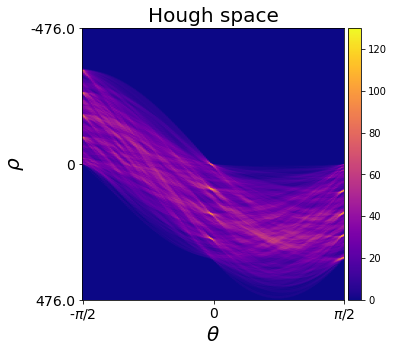

In [208]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

ax = plt.subplot()

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
im = ax.imshow(h, cmap="plasma", aspect="auto", vmax=130)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)

ax.set_xticks([0, 90, 180])
ax.set_xticklabels(["-$\pi$/2", "0", "$\pi$/2"], fontsize=14)
ax.tick_params(axis='y', labelsize= 14)

ax.set_yticks([0, h.shape[0]//2, h.shape[0]])
ax.set_yticklabels([d[0], 0, d[-1]], fontsize=14)

ax.set_xlabel("$\\theta$", fontsize=20)
ax.set_ylabel("$\\rho$", fontsize=20)
ax.set_title("Hough space", fontsize=20)

for _, theta, rho in zip(*hough_line_peaks(h, angles, d)):
    print(f"{np.rad2deg(theta):0.2f}, {rho:0.2f}")

plt.show()

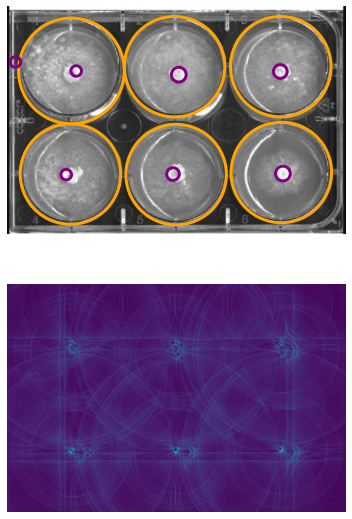

In [209]:
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.color import rgb2gray
from skimage.draw import circle_perimeter

plate = imread("six_well_plate_Kwak_2009.png")
plate = rgb2gray(plate)
plate = plate[30:-40]
fig, ax = plt.subplots(2, 1, figsize=(5, 8))
ax[0].imshow(plate, cmap="gray")

radii = range(90, 110, 5)
res = hough_circle(canny(plate, sigma=3), radii)
accums, cx, cy, radii = hough_circle_peaks(res, radii, min_xdistance=60, min_ydistance=60, threshold = .22)

for c_x, c_y, r in zip(cx, cy, radii):
    c = plt.Circle((c_x, c_y), r, color='orange', linewidth=3, fill=False)
    ax[0].add_artist(c)

ax[1].imshow(res[1], cmap="viridis")

radii = range(10, 15)
res = hough_circle(canny(plate, sigma=3), radii)
accums, cx, cy, radii = hough_circle_peaks(res, radii, min_xdistance=90, min_ydistance=90, threshold = .35)

for c_x, c_y, r in zip(cx, cy, radii):
    c = plt.Circle((c_x, c_y), r, color='purple', linewidth=3, fill=False)
    ax[0].add_artist(c)

for a in ax:
    a.axis("off")

plt.tight_layout()   

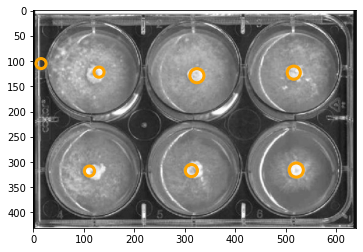

Center [(324.0, 129.0)], radius 14.0, accum 0.48
Center [(111.0, 318.0)], radius 10.0, accum 0.47
Center [(521.0, 316.0)], radius 14.0, accum 0.44
Center [(313.0, 317.0)], radius 12.0, accum 0.43
Center [(516.0, 123.0)], radius 13.0, accum 0.40
Center [(15.0, 105.0)], radius 10.0, accum 0.36
Center [(130.0, 122.0)], radius 10.0, accum 0.36


In [210]:
# Non maximum suppression
circles = np.column_stack((cx, cy, radii, accums))

def non_max_suppression(circles):
    """
    Perform non-maximum suppression on the circles.
    
    Params
    ------
    circles: ndarray of shape (n, 4) where n is the number of circles. 
             Columns are (x, y, radius, Hough's accumulator)
    """
    # Sort by accumulator
    circles = circles[np.argsort(-circles[:, 3])]

    for i, (cx, cy, rad, acc) in enumerate(circles):
        # Find the bounding box top-left and bottom-right
        tl = (cx - rad, cy - rad)
        br = (cx + rad, cy + rad)

        for c in circles[i+1:]:
            # If the circle is inside the bounding box, it's a false positive
            if tl[0] <= c[0] <= br[0] and tl[1] <= c[1] <= br[1]:
                circles[i, 3] = 0
                break

    # Remove the false positives
    circles = circles[circles[:, 3] > 0]
    return circles

new_circles = non_max_suppression(circles)

plt.imshow(plate, cmap="gray")

for c_x, c_y, r, _ in new_circles:
    c = plt.Circle((c_x, c_y), r, color='orange', linewidth=3, fill=False)
    plt.gca().add_artist(c)

plt.show()

for c in new_circles:
    print(f"Center [{c[0], c[1]}], radius {c[2]}, accum {c[3]:0.2f}")


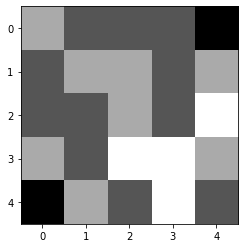

[[2 1 1 1 0]
 [1 2 2 1 2]
 [1 1 2 1 3]
 [2 1 3 3 2]
 [0 2 1 3 1]]
[[0 0 1 0]
 [1 3 3 3]
 [0 5 1 0]
 [0 1 1 1]]


In [211]:
from skimage.feature import greycomatrix

np.random.seed(12345)
img = np.random.choice(range(4), (5, 5))
plt.imshow(img, cmap="gray")
plt.show()
glcm = greycomatrix(img, [1], [0], 4)

print(img)
print(glcm[:,:,0,0])

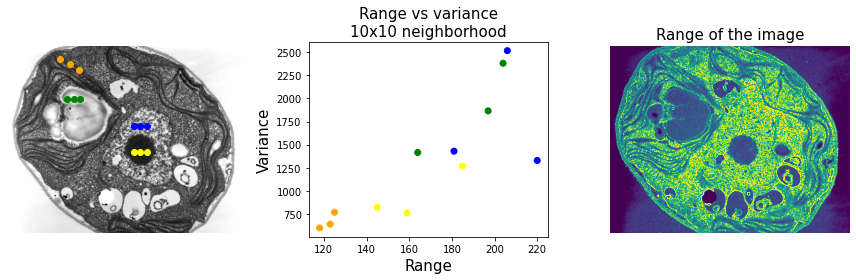

In [212]:
from skimage.filters.rank import maximum, minimum
img = imread("Chlamydomonas_TEM_07.jpg")
img = img[:-30,:,0]

fig, ax = plt.subplots(1, 3, figsize = (12, 4))
ax[0].imshow(img, cmap="gray")
ax[0].axis("off")

x = [400, 470, 540, 
     450, 500, 550,
     950, 1000, 1050,
     950, 1000, 1050]

y = [100, 140, 180,
     400, 400, 400,
     600, 600, 600,
     800, 800, 800]

colors = ["orange", "green", "blue", "yellow"]

rng = []
var = []

sz = 10 # Neighbourhood half-size
for i, (xx, yy) in enumerate(zip(x, y)):
    ax[0].scatter(xx, yy, color=colors[i // 3])
    rng.append(np.ptp(img[xx-sz:xx+sz, yy-sz:yy+sz]))
    var.append(np.var(img[xx-sz:xx+sz, yy-sz:yy+sz]))    

ax[1].scatter(x=rng, y=var, color=np.repeat(colors, 3))
ax[1].set_xlabel("Range", fontsize=15)
ax[1].set_ylabel("Variance", fontsize = 15)
ax[1].set_title("Range vs variance\n10x10 neighborhood", fontsize = 15)

img_min = minimum(img, np.ones((3,3)))
img_max = maximum(img, np.ones((3,3)))

ax[2].imshow(img_max-img_min, cmap="viridis", vmax=70)
ax[2].axis("off")
ax[2].set_title("Range of the image", fontsize = 15)
plt.tight_layout()



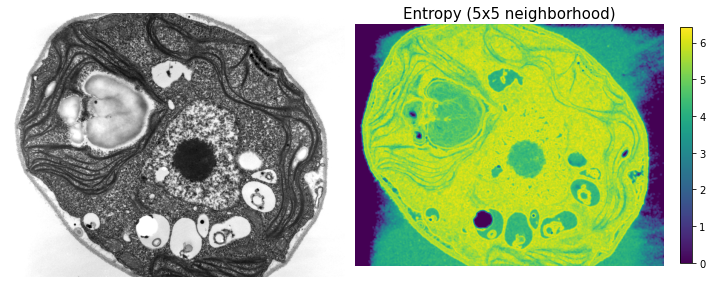

In [213]:
from skimage.filters.rank import entropy

img_entropy = entropy(img, selem=np.ones((10, 10)))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(img, cmap="gray")
im = ax[1].imshow(img_entropy)
ax[1].set_title("Entropy (5x5 neighborhood)", fontsize=15)
plt.colorbar(im, ax=ax[1], fraction=0.035)

for a in ax:
    a.axis("off")

plt.tight_layout()

ValueError: x and y must be the same size

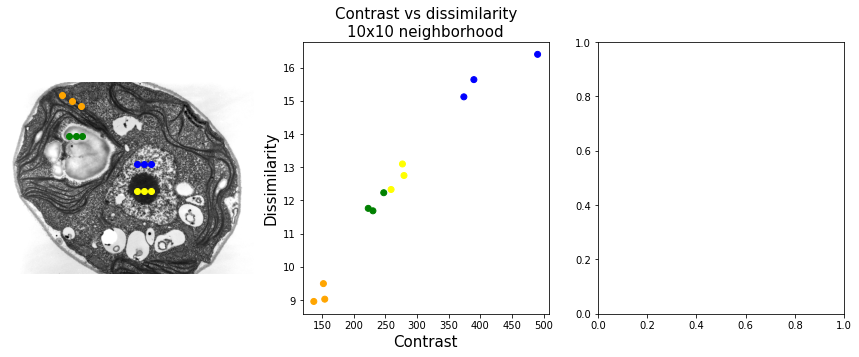

In [214]:
from skimage.feature import greycomatrix, greycoprops

x = [400, 470, 540,
     450, 500, 550,
     950, 1000, 1050,
     950, 1000, 1050]

y = [100, 140, 180,
     400, 400, 400,
     600, 600, 600,
     800, 800, 800]

colors = ["orange", "green", "blue", "yellow"]

rng = []
var = []

sz = 10  # Neighbourhood half-size

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img, cmap="gray")

contr = []
dissimil = []
energy = []
homog = []

for i, (xx, yy) in enumerate(zip(x, y)):
    ax[0].scatter(xx, yy, color=colors[i // 3])
    glcm = greycomatrix(img[xx-sz:xx+sz, yy-sz:yy+sz],
                        distances=[1], angles=[0], levels=256)
    contr.append(greycoprops(glcm, 'contrast')[0][0])
    dissimil.append(greycoprops(glcm, 'dissimilarity')[0][0])
    energy.append(greycoprops(glcm, 'energy')[0][0])
    homog.append(greycoprops(glcm, 'homogeneity')[0][0])

ax[0].axis("off")

ax[1].scatter(x=contr, y=dissimil, color=np.repeat(colors, 3))
ax[1].set_xlabel("Contrast", fontsize=15)
ax[1].set_ylabel("Dissimilarity", fontsize=15)
ax[1].set_title("Contrast vs dissimilarity\n10x10 neighborhood", fontsize=15)

ax[2].scatter(x=energy, y=corr, color=np.repeat(colors, 3))
ax[2].set_xlabel("Energy", fontsize=15)
ax[2].set_ylabel("Homogeneity", fontsize=15)
ax[2].set_title("Energy vs homogeneity\n10x10 neighborhood", fontsize=15)

plt.tight_layout()

In [ ]:
from skimage.transform import rescale
from skimage import img_as_ubyte

img = imread("Chlamydomonas_TEM_07.jpg")
img = img[:-30,:,0]
img = img_as_ubyte(rescale(img, 0.4, anti_aliasing=True))
print(img.shape)

contr = []
dissimil = []
homog = []

for x in range(sz, img.shape[0]-sz):
    for y in range(sz, img.shape[1]-sz):
        glcm = greycomatrix(img[x-sz:x+sz, y-sz:y+sz],
                    distances=[1], angles=[0], levels=256)
        contr.append(greycoprops(glcm, 'contrast')[0][0])
        dissimil.append(greycoprops(glcm, 'dissimilarity')[0][0])
        homog.append(greycoprops(glcm, 'homogeneity')[0][0])

contr = np.array(contr).reshape((img.shape[0]-2*sz, 
img.shape[1]-2*sz))
dissimil = np.array(dissimil).reshape((img.shape[0]-2*sz,
img.shape[1]-2*sz))
homog = np.array(homog).reshape((img.shape[0]-2*sz,
img.shape[1]-2*sz))

(563, 720)


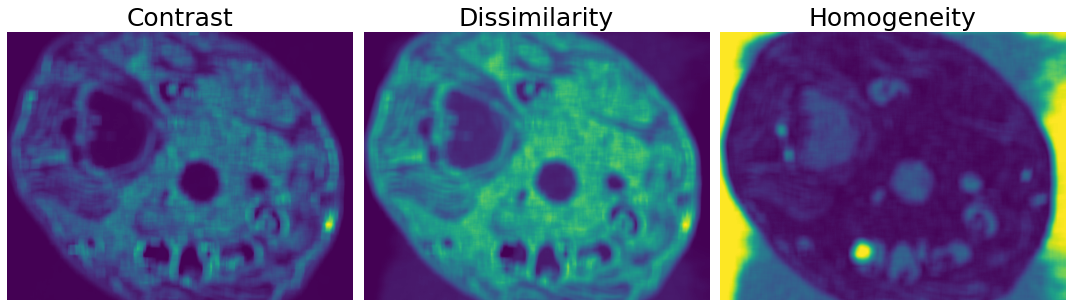

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

titles = ["Contrast", "Dissimilarity", "Homogeneity"]
ax[0].imshow(contr, cmap="viridis")  
ax[1].imshow(dissimil, cmap="viridis")
ax[2].imshow(homog, cmap="viridis")

for i, a in enumerate(ax):
    a.axis("off")
    a.set_title(titles[i], fontsize=25)

plt.tight_layout()

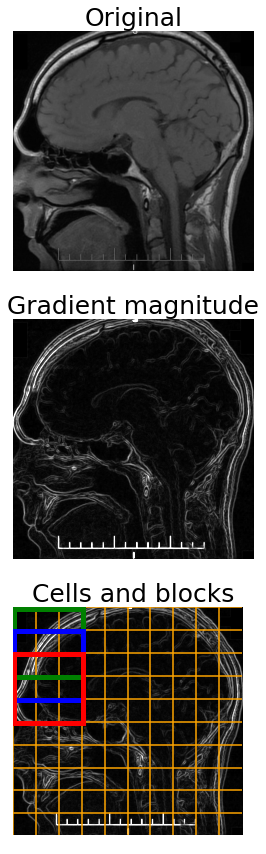

In [ ]:
from skimage.filters.edges import sobel
#img = imread("Drosophila_germarium_TEM_CC0.jpg")
img = imread("MRI_grayscale.png")

fig, ax = plt.subplots(3, 1, figsize=(5, 15))

im_sobel = sobel(img)

ax[0].imshow(img, cmap="gray")
ax[1].imshow(im_sobel, cmap="gray", vmax=.2)
ax[2].imshow(im_sobel, cmap="gray", vmax=.2)

ax[2].hlines(y=range(0, img.shape[0], 80),
           xmin=0, xmax=img.shape[1], color="orange")
ax[2].vlines(x=range(0, img.shape[1], 80),
           ymin=0, ymax=img.shape[0], color="orange")

rect = plt.Rectangle((5, 5), 240, 240, linewidth=5,
                     edgecolor='green', facecolor='none', zorder=10)
ax[2].add_patch(rect)
rect = plt.Rectangle((5, 85), 240, 240, linewidth=5,
                     edgecolor='blue', facecolor='none', zorder=10)
ax[2].add_patch(rect)
rect = plt.Rectangle((5, 165), 240, 240, linewidth=5,
                     edgecolor='red', facecolor='none', zorder=10)
ax[2].add_patch(rect)

titles = ["Original", "Gradient magnitude", "Cells and blocks"]

for i, a in enumerate(ax):
    a.axis("off")
    a.set_title(titles[i], fontsize=25)


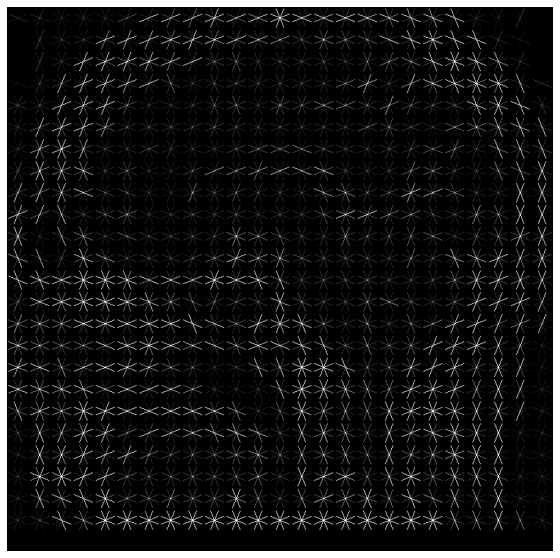

In [ ]:
from skimage.feature import hog
from skimage.exposure import rescale_intensity

hog_features, hog_image = hog(im_sobel, orientations=4, 
                    pixels_per_cell= (32, 32),
                    cells_per_block= (5, 5), 
                    visualize= True, 
                    multichannel=False)

# Rescale histogram for better display
hog_image_rescaled = rescale_intensity(hog_image,
                                       in_range=(0, .005))

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.axis("off")
ax.imshow(hog_image_rescaled, cmap="gray")
plt.show()